In [1]:
import math
import copy
import numpy as np
import matplotlib.pyplot as plt
import time
from gauss import gaussian_solve
from lu import lu_solve
from seidel import seidel_solve
from utils import generate_random_matrix, generate_b_vector, generate_hilbert_matrix

Оценка зависимости числа обусловленности в зависимости от параметра k и n:

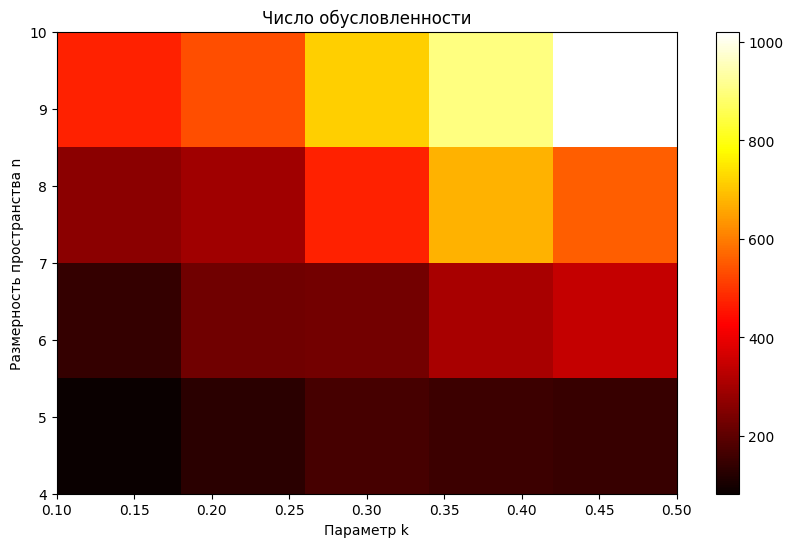

In [2]:
ns = list(range(4, 11, 2))
ks = [0.1, 0.2, 0.3, 0.4, 0.5] # параметр для регуляции числа обусловленности

cond_numbers = np.zeros((len(ns), len(ks)))
tries = 5

# Подсчет число обусловленности для разных n и k
for n_idx, n in enumerate(ns):
    for k_idx, k in enumerate(ks):
        cond_sum = 0
        for _ in range(tries):
            A = generate_random_matrix(k, n)
            cond = np.linalg.cond(A) # число обусловленности матрицы A
            cond_sum += cond
        cond_numbers[n_idx, k_idx] = cond_sum / tries

# Выводим числа обусловленностей
fig, ax = plt.subplots(figsize=(10, 6))
im = ax.imshow(cond_numbers, extent=[min(ks), max(ks), min(ns), max(ns)], aspect='auto',
               cmap='hot', origin='lower')
ax.set_xlabel('Параметр k')
ax.set_ylabel('Размерность пространства n')
ax.set_title('Число обусловленности')
fig.colorbar(im)
plt.show()

Оценка зависимости точности полученного решения в зависимости от параметра k и n

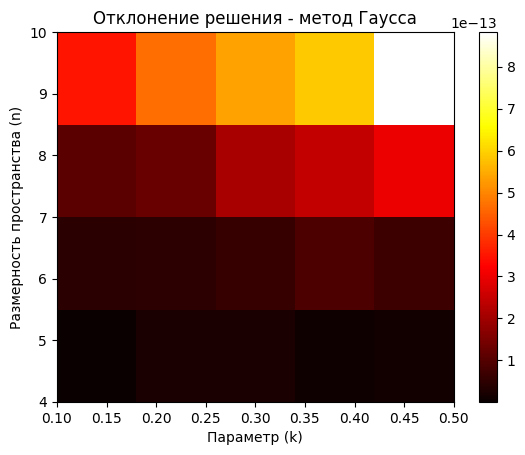

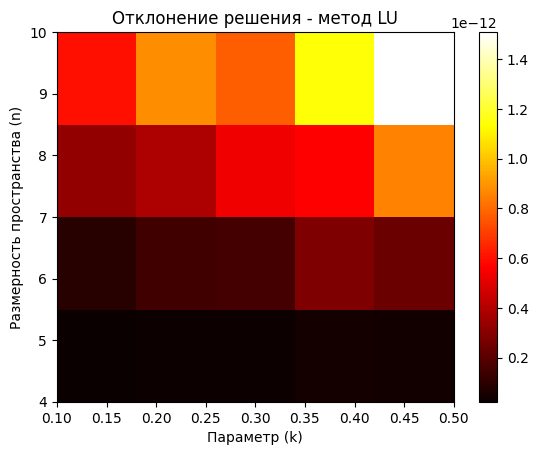

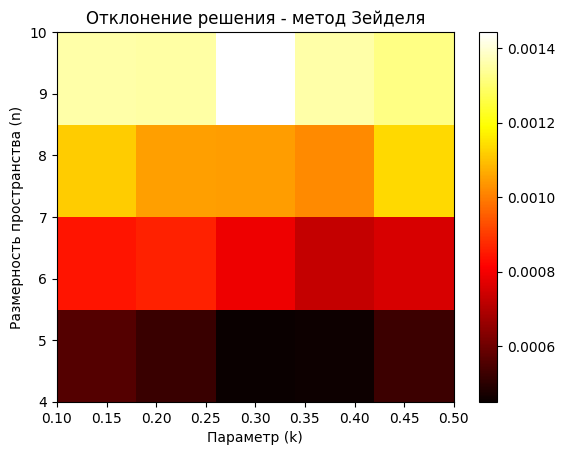

In [3]:
method_names = ['метод Гаусса', 'метод LU', 'метод Зейделя']
methods = [gaussian_solve, lu_solve, seidel_solve]
tries = 5

# Подсчсет и вывод точности решений для разных методов, параметров n и k
for method_name, method in zip(method_names, methods):
    error_matrix = np.zeros(shape=(len(ns), len(ks)))

    for n_idx, n in enumerate(ns):
        for k_idx, k in enumerate(ks):

            error = 0
            for _ in range(tries):
                A = generate_random_matrix(k, n)
                b = generate_b_vector(n)
                x = method(A, b)
                error += np.linalg.norm(np.dot(A, x) - b)

            error_matrix[n_idx, k_idx] = error / tries

    plt.clf()
    fig, ax = plt.gcf(), plt.gca()
    im = ax.imshow(error_matrix, extent=[min(ks), max(ks), min(ns), max(ns)],
                    aspect='auto', cmap='hot', origin='lower')
    ax.set_xlabel('Параметр (k)')
    ax.set_ylabel('Размерность пространства (n)')
    ax.set_title(f'Отклонение решения - {method_name}')
    fig.colorbar(im)
    plt.show()

Оценка зависимости числа обусловленности в зависимости от параметра n для матриц Гильберта:

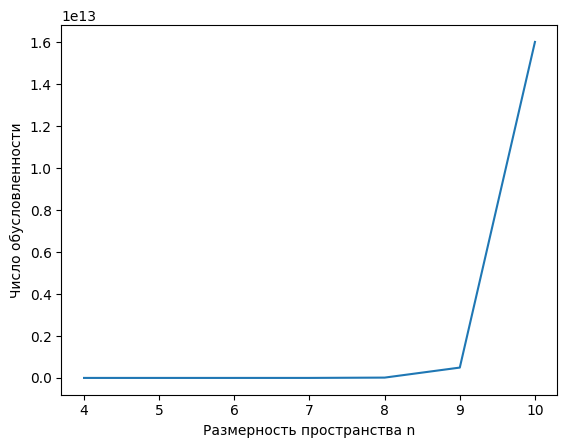

In [4]:
ns = list(range(4, 11, 1))
ks = [0.1, 0.2, 0.3, 0.4, 0.5] # параметр для регуляции числа обусловленности

cond_numbers = []
tries = 5

# Подсчет число обусловленности для разных n и k
for k_idx, n in enumerate(ns):
        cond_sum = 0
        for _ in range(tries):
            A = generate_hilbert_matrix(n)
            cond = np.linalg.cond(A) # число обусловленности матрицы A
            cond_sum += cond
        cond_numbers.append(cond_sum / tries)

# Выводим зависимость
plt.plot(ns, cond_numbers)
ax = plt.gca()
ax.set_ylabel('Число обусловленности')
ax.set_xlabel('Размерность пространства n')
plt.show()

Оценка зависимости точности полученного решения для матрицы Гильберта в зависимости от параметра n

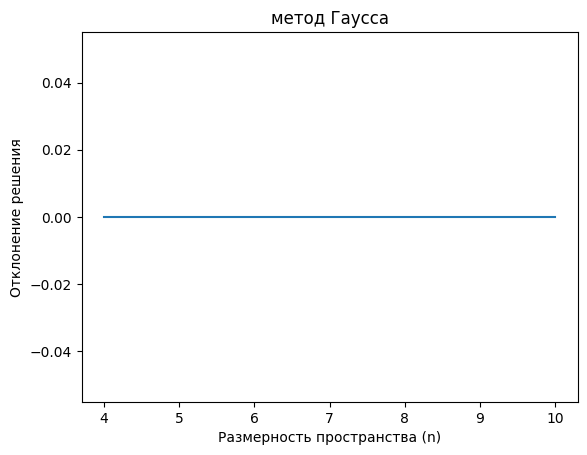

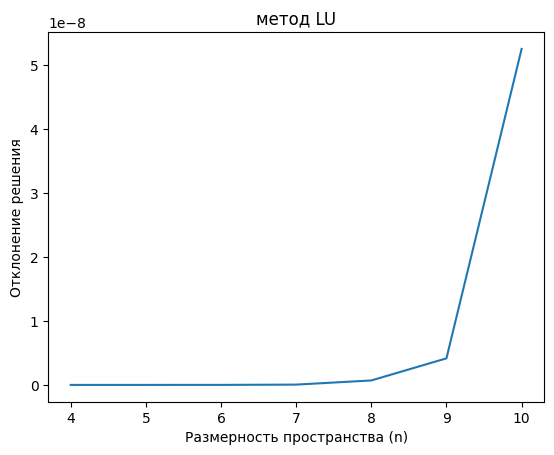

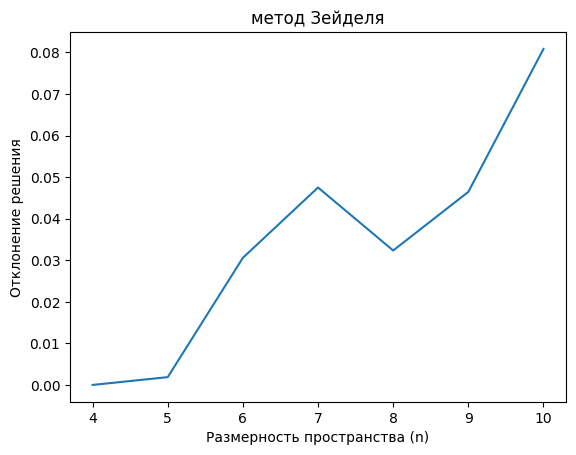

In [5]:
method_names = ['метод Гаусса', 'метод LU', 'метод Зейделя']
methods = [gaussian_solve, lu_solve, seidel_solve]
tries = 2

# Подсчсет и вывод точности решений для разных методов и параметра n
for method_name, method in zip(method_names, methods):
    errors = [] 

    for n in ns:

        error = 0
        for _ in range(tries):
            A = generate_hilbert_matrix(n)
            b = generate_b_vector(n)
            x = method(A, b)
            error += np.linalg.norm(np.dot(A, x) - b)

        errors.append(error / tries)

    plt.plot(ns, errors)
    ax = plt.gca()
    ax.set_xlabel('Размерность пространства (n)')
    ax.set_ylabel('Отклонение решения')
    ax.set_title(f'{method_name}')
    plt.show()

Сравнение прямых(Гаусса и LU) и итерационного метода(Зейделя) по эффективности методов от размеров n матрицы:

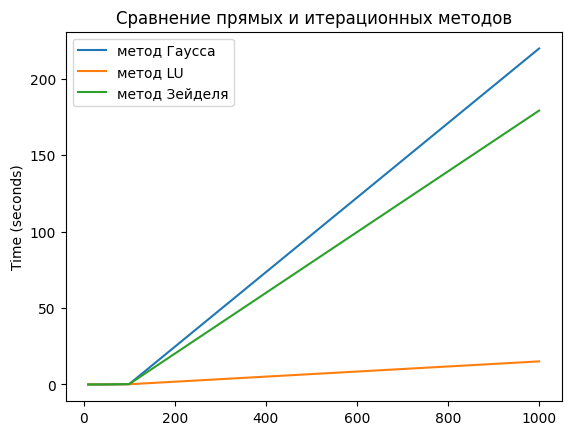

In [6]:
from timeit import timeit

matrix_sizes = [10, 20, 50, 100, 1000]

gaussian_time_passed = []
lu_time_passed = []
seidel_time_passed = []
tries = 5

for n in matrix_sizes:
    A = np.random.rand(n, n)
    b = np.random.rand(n)

    time_passed = timeit(lambda: gaussian_solve(A, b), number=tries) / tries
    gaussian_time_passed.append(time_passed)

    time_passed = timeit(lambda: lu_solve(A, b), number=tries) / tries
    lu_time_passed.append(time_passed)

    time_passed = timeit(lambda: seidel_solve(A, b), number=tries) / tries
    seidel_time_passed.append(time_passed)

plt.plot(matrix_sizes, gaussian_time_passed, label='метод Гаусса')
plt.plot(matrix_sizes, lu_time_passed, label='метод LU')
plt.plot(matrix_sizes, seidel_time_passed, label='метод Зейделя')
plt.ylabel('Time (seconds)')
plt.title('Сравнение прямых и итерационных методов')
plt.legend()
plt.show()